# LEZIONE 7

***File***

***7.1 Persistenza***

Finora, abbiamo imparato come scrivere programmi e comunicare le nostre intenzioni all’*unità di elaborazione centrale* usando l’*esecuzione condizionale*, le *funzioni* e le *iterazioni*. Abbiamo anche imparato come creare e utilizzare strutture di dati nella memoria principale. La CPU e la memoria RAM sono i luoghi dove il nostro software lavora e funziona. È dove si forma tutto il “pensiero”. Ma se ricordate le nostre discussioni sull’architettura hardware, una volta che l’alimentazione viene tolta, qualsiasi cosa memorizzata nella CPU o nella memoria principale viene cancellata. Praticamente, i nostri programmi sono stati solo fugaci esercizi divertenti per imparare Python.

In questo capitolo, iniziamo a lavorare con i file nella *Memoria Secondaria* che, come spiegato all'inizio, non viene cancellata quando si spegne il pc e, nel caso di utilizzo di un’unità flash USB, consente di rimuovere dal sistema i dati prodotti dai nostri script e trasportarli su un altro sistema. Ci concentreremo principalmente sulla lettura e la scrittura di *file di testo* simile a quelli che creiamo in un editor di testo. Più avanti vedremo come lavorare con i file di *database*, che sono file binari progettati specificamente per essere letti e scritti tramite programmi di database.

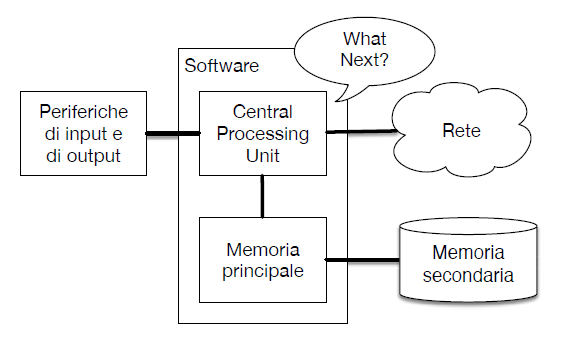

***7.2 Aprire i file***

Quando vogliamo *leggere* o *scrivere* un file (ad esempio sul disco rigido), dobbiamo prima *aprire* il file. Quando apriamo un file, chiediamo al sistema operativo di trovare il file di cui forniamo il nome e di assicurarsi che esista. Nel corso della lezione, useremo i file [mbox.txt](https://www.py4e.com/code3/mbox.txt), e [mbox-short.txt](https://www.py4e.com/code3/mbox-short.txt), scarichiamoli e salviamoli nella stessa cartella in cui salviamo gli script Python.

Nell’esempio seguente, apriremo il file `mbox.txt`
```
fhand = open ('mbox.txt')
print(fhand)
```



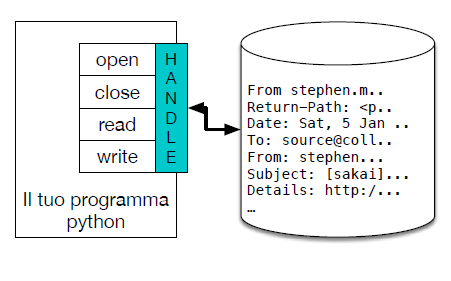

Se l’operazione Open ha successo, il sistema operativo ci restituisce un *file handle*. L’handle del file non rappresenta il dato reale contenuto nel file, ma piuttosto un "**gestore**" che possiamo usare per leggere i dati. Viene fornito un gestore (letteralmente handle = gestore) che indica che il file richiesto esiste e si dispone delle autorizzazioni appropriate per leggere il file.

Se il file non esiste, open fallirà visualizzando un traceback e ovviamente non verrà fornito un handle.

**Proviamo a cambiare il nome del file indicandone uno che non esiste...**

Successivamente useremo try e except per gestire con più eleganza la situazione
in cui si prova ad aprire un file che non esiste.

***7.3 File di testo e righe***

Un file di testo può essere pensato come una sequenza di righe, proprio come una
stringa Python può essere vista come una sequenza di caratteri. Ad esempio, questo è un estratto del file `mbox.txt` che abbiamo scaricato, si tratta di un file di testo dimostrativo che registra l’attività di posta di vari appartenenti di un team di sviluppo di progetti open source:
```
From stephen.marquard@uct.ac.za Sab 5 gen 09:14:16 2008
Return-Path: <postmaster@collab.sakaiproject.org>
Date: Sat, 5 Jan 2008 09:12:18 -0500
To: source@collab.sakaiproject.org
From: stephen.marquard@uct.ac.za
Subject: [sakai] svn commit: r39772 - content / branches /
Details: http: //source.sakaiproject.org/viewsvn/? view = rev & rev
= 39772
```

Questi file sono strutturati in un formato standard per file contenenti più messaggi di posta. Le righe che iniziano con “From” separano i messaggi e le righe che iniziano con “From:” fanno parte dei messaggi. Per ulteriori informazioni sul formato mbox: https://en.wikipedia.org/wiki/Mbox

Per suddividere il file in righe, c’è un carattere speciale che rappresenta la *fine della riga* chiamato carattere **newline**.
In Python, il carattere newline viene rappresentato con backslash-n (`\n`) tra le costanti di stringa. Anche se sembra essere composto da due caratteri, è in realtà un singolo carattere. Prendiamo come esempio il seguente listato. Il contenuto che stiamo inserendo nella variabile “stuff” nell’interprete, ci mostra che la stringa contiene i caratteri \n. Quando però la stampiamo tramite il comando print, possiamo notare che la stringa viene mostrata su due righe, spezzata nel punto dove è presente il carattere newline.



In [ ]:
stuff = 'Hello\nWorld!'
stuff

In [ ]:
print(stuff)

In [ ]:
stuff = 'X\nY'
print(stuff)

In [ ]:
len(stuff)

Nel secondo caso la lunghezza della stringa `X\nY` è di tre caratteri perché il carattere newline conta come un singolo carattere. Quindi, quando guardiamo
le linee in un file, dobbiamo immaginare che ci sia uno speciale carattere invisibile chiamato newline alla fine di ogni riga che indica la fine della riga. Quindi il carattere newline divide i caratteri del file in righe.

***7.4 Lettura dei file***

Mentre il file handle non contiene i dati per il file, è abbastanza semplice costruire un ciclo for per leggere e contare ciascuna delle righe in un file.

**Creiamo uno script col codice seguente ed eseguiamolo...**
```
fhand = open('mbox-short.txt')
count = 0
for line in fhand:
  count = count + 1
print('Line Count:', count)
```


Possiamo usare il *file handle* come sequenza per il ciclo *for* che, in questo caso, trova e visualizza semplicemente il numero di righe. La traduzione approssimativa del ciclo for in italiano è

*Per ogni riga nel file indicato dal file handle, aggiungi uno alla variabile count*

**La ragione per cui la funzione open non legge subito l’intero file è perchè potrebbe essere di notevoli dimensioni e contenere molti gigabyte
di dati. L’istruzione open richiede lo stesso tempo indipendentemente dalla
dimensione del file.**

Il ciclo for effettivamente fa in modo che vengano letti i dati contenuti nel file.

Quando il file viene letto utilizzando un ciclo for, **Python si occupa di suddividere i dati in righe separate usando il carattere newline**. Python legge ogni riga fino al *carattere newline* e lo include come ultimo carattere nella variabile `line` in ogni iterazione del ciclo for.

**Poiché il ciclo for prende in considerazione i dati una riga alla volta, può leggere e contare efficientemente le righe in file di grandi dimensioni senza esaurire la memoria principale**. Lo script precedente può contare le righe in file di qualsiasi dimensione utilizzando pochissima memoria dato che ogni riga, dopo essere stata letta e “contata” , viene subito dopo scartata.

Se il file è relativamente piccolo rispetto alla dimensione della memoria principale, puoi leggere l’intero file in un’unica stringa applicando il metodo read sul file handle:
```
fhand = open('mbox-short.txt')
inp = fhand.read()
print(len(inp))
print(inp[:20])
```

Eseguiamo lo script e vedremo che l’intero contenuto del file mbox-short.txt, tutti i *94.626* caratteri, viene letto direttamente nella variabile inp (il primo output). Usiamo il taglio delle stringhe per stampare i primi 20 caratteri dei dati di stringa memorizzati in inp (il secondo output).

Quando il file viene letto in questo modo, **tutti i caratteri**, inclusi tutte le righe e i caratteri newline, **vengono considerati come una grande stringa** nella variabile inp.

Ricordiamoci che questa applicazione della funzione open dovrebbe essere usata solo se i dati del file "entrano" comodamente nella memoria principale del nostro computer.

Se il file è troppo grande per adattarsi alla memoria principale, dovremmo scrivere il nostro programma in modo che legga il file in blocchi utilizzando un ciclo for o while.

***7.5 Ricerche in un file***

Quando si cercano dei dati in un file è molto comune leggere un file analizzando solo le righe che soddisfano una particolare condizione, ignorando il resto, che normalmente è la maggior parte del testo. Possiamo combinare il modello per la lettura di un file con i metodi per le stringhe per costruire i primi semplici meccanismi di ricerca.

Ad esempio, se volessimo leggere un file e stampare solo le righe che iniziano
con il prefisso “From:”, potremmo usare il metodo per le stringhe startswith per
selezionare solo le righe con il prefisso desiderato

```
fhand = open('mbox-short.txt')
count = 0
for line in fhand:
  if line.startswith('From:'):
    print(line)
```

**Creiamo lo script e verifichiamo l'output...**



L’output sembra ottimo dato che le uniche righe che stiamo visualizzando sono
quelle che iniziano con “From:”. Perché allora stiamo vedendo delle righe vuote in più? Ciò è dovuto al carattere *invisibile* newline.

Ognuna delle righe termina con il carattere newline. L’istruzione print visualizza la stringa nella variabile line che include una riga e quindi print visualizza un’altra nuova riga, ottenendo l’effetto di doppia spaziatura che vediamo. Potremmo usare il taglio delle stringhe per visualizzare tutto tranne l’ultimo carattere, ma c’è un approccio più semplice: usare il metodo `rstrip` per rimuovere gli spazi bianchi dal lato destro di una stringa, come nell’esempio seguente.

```
fhand = open('mbox-short.txt')
for line in fhand:
  line = line.rstrip()
  if line.startswith('From:'):
    print(line)
```

**Modifichiamo lo script di prima e verifichiamo l'output...**


Man mano che i nostri script di gestione dei file diventano più complessi, potremmo voler strutturare i cicli di ricerca utilizzando `continue`. L’idea di base del ciclo di ricerca è che stiamo cercando le righe *interessanti* e ignorando quelle *non interessanti*; inoltre, quando troviamo una riga interessante, vorremo farne qualcosa.

Possiamo strutturare questo tipo di ciclo come nell’esempio seguente

```
fhand = open('mbox-short.txt')
for line in fhand:
  line = line.rstrip()
  # Skip 'uninteresting lines'
  if not line.startswith('From:'):
    continue
  # Process our 'interesting' line
  print(line)
```

**Rimodifichiamo lo script (o possiamo crearne un altro) e verifichiamo l'output...**


**L’output del programma è lo stesso**. In altre parole, le righe non interessanti sono quelle che non iniziano con “From:”, che vengono saltate usando continue.

**L’elaborazione verrà riservata alle righe "interessanti"** (nel nostro caso specifico, quelle che iniziano con “From:”).

Possiamo usare il metodo `find` per simulare una ricerca simile a quella di un editor di testo che trova le righe che contengono la stringa ricercata.
Dato che **find cerca una stringa all’interno di un’altra e ne restituisce o la posizione o -1 se la stringa non è presente**, possiamo scrivere il ciclo seguente per visualizzare le righe che contengono la stringa “@uct.ac.za”(cioè, le email che provengono dall’università di Cape Town in Sud Africa)

```
fhand = open('mbox-short.txt')
for line in fhand:
  line = line.rstrip()
  if line.find('@uct.ac.za') == -1: continue
    print(line)
```

**Creiamo lo script e verifichiamo l'output...**


***7.6 Far scegliere all’utente il nome del file***

Non è il caso di modificare il nostro codice Python ogni volta che vogliamo elaborare un file diverso: è più utile chiedere all’utente di inserire il nome del file ogni volta che il programma viene eseguito. In questo modo è possibile usare il nostro programma su file diversi senza modificare continuamente il codice.

È una modifica abbastanza semplice da implementare: l’utente potrà inserire il
nome del file utilizzando la funzione `input`

```
fname = input('Enter the file name: ')
fhand = open(fname)
count = 0
for line in fhand:
  if line.startswith('Subject:'):
    count = count + 1
print('There were', count, 'subject lines in', fname)
```

Il nome del file inserito dall’utente viene salvato nella variabile fname e successivamente aperto. Ora è possibile eseguire il programma su file diversi senza alterarne continuamente il codice.

**...e chi siamo noi per non provarlo...**



Prima di proseguire, dai un’occhiata al programma precedente e prova a chiederti: “Che cosa potrebbe andare storto?” o “Che cosa potrebbe fare il nostro amato utente per far sì che il nostro piccolo programma si blocchi
visualizzando un traceback?”

***7.7 Utilizzare try, except e open***

Cosa succede se il nostro utente digita qualcosa che non è il nome di un file?

**proviamo a lanciare il nostro script e ad inserire il nome di un file non esistente...**

```
python search6.py
  Enter the file name: missing.txt
  Traceback (most recent call last):
  File "search6.py", line 2, in <module>
  fhand = open (fname)
  FileNotFoundError: [Errno 2] No such file or directory: 'missing.txt'
python search6.py
  Enter the file name: na na boo boo
  Traceback (most recent call last):
  file "search6.py", riga 2, in <module>
  fhand = open (fname)
  FileNotFoundError: [Errno 2] No such file or directory : 'na na boo boo'
```

Gli utenti faranno tutto quello che possono, di proposito, con intenzioni
malevole, o, più spesso, incosapevolmente per "rompere" i nostri script. In effetti, un componente importante di qualsiasi team di sviluppo software è la persona o il gruppo chiamato Quality Assurance (o QA in breve) il cui compito è quello di fare le cose più folli possibili nel tentativo di violare il software che hanno creato.

Il team addetto al controllo qualità è responsabile della ricerca dei difetti nei programmi prima di consegnarli agli utenti finali che potrebbero acquistare il software o pagare il nostro stipendio per sviluppare software. Quindi, anche se non sembra, la squadra di controllo qualità è la migliore amica dello sviluppatore.

Tornando al nostro script, una volta individuato il difetto nel programma, possiamo sistemarlo elegantemente usando la struttura try/except: dobbiamo supporre che la chiamata open potrebbe fallire e aggiungere del codice come nell’esempio seguente:

```
fname = input('Enter the file name: ')
try:
  fhand = open(fname)
except:
  print('File cannot be opened:', fname)
  exit()
count = 0
for line in fhand:
  if line.startswith('Subject:'):
    count = count + 1
print('There were', count, 'subject lines in', fname)
```

La funzione `exit` termina immediatamente il programma. È una funzione che
possiamo definire non reversibile. Ora, quando il nostro utente (o il team controllo qualità) digita un nome incompleto o errato, li “intercettiamo” e recuperiamo con eleganza

**inseriamo il costrutto try-except nel nostro codice e proviamo a inserire il nome di un file non esistente...**



Proteggere la chiamata open è un buon esempio dell’uso corretto di try e except
in un programma Python. Usiamo il termine **Pythonic** quando stiamo facendo
qualcosa che rientri nella *filosofia di Python*. Potremmo dire che l’esempio sopra è il modo *Pythonic* di aprire un file.
Una volta che diventerai più abile in Python, potresti trovarti invischiato in una discussione con altri programmatori Python per decidere quale possa essere, tra due soluzioni equivalenti a un problema, quella *più Pythonic*.
L’obiettivo di essere *più Pythonic* cattura l’idea che la programmazione sia in
parte ingegneria e in parte arte. Non siamo interessati solo a far funzionare qualcosa, vogliamo anche che la nostra soluzione sia elegante e apprezzata dai nostri pari.

***7.8 Scrivere file***

Per scrivere all’interno di un file, dobbiamo semplicemente aprirlo inserendo “w” come secondo parametro

```
fout = open ('output.txt', 'w')
print (fout)
```

Aprendo in modalità di scrittura un file che già esiste ne cancelleremo i dati già presenti e in sostanza lo formatteremo, quindi attenzione! Se invece il file non esiste, ne viene creato uno nuovo.
Il write applicato al file handle dell’oggetto permette di salvare i dati nel file, restituendo il numero di caratteri scritti.
La modalità di scrittura predefinita per scrivere (e leggere) stringhe, è testo.

```
line1 = "These here's the wattle,\n"
fout.write (line1)
```

L’oggetto file tiene traccia di dove si trova, quindi se chiamiamo nuovamente write, i nuovi dati verranno aggiunti alla fine del file.

Dobbiamo assicurarci di gestire le estremità delle righe mentre scriviamo nel file inserendo esplicitamente il carattere newline quando vogliamo terminare una riga. **L’istruzione print aggiunge automaticamente una nuova riga, ma il metodo write non inserisce automaticamente un carattere newline**.

```
>>> line2 = 'the emblem of our land.\n'
>>> fout.write (line2)
```

Quando abbiamo finito di scrivere, dobbiamo chiudere il file per assicurarci che l’ultimo bit di dati venga effettivamente scritto sul disco in modo che non vada perso se si interrompe l’alimentazione.

```
fout.close ()
```

Potremmo chiudere i file che apriamo anche per leggerli, ma possiamo essere un
po’ approssimativi se apriamo solo alcuni file dato che Python si assicura che tutti i file aperti vengano chiusi quando il programma termina. Quando **scriviamo** dei file, invece, vogliamo chiudere esplicitamente i file in modo da non lasciare nulla al caso.

***7.9 Debug***

Quando leggiamo e scriviamo il contenuto di file, potremmo incontrare dei problemi con gli spazi bianchi. Questi errori possono essere difficili da risolvere perché gli spazi, le schede e gli a capo sono normalmente invisibili

In [ ]:
s = '1 2\t 3\n 4'
print (s)

In questi casi la funzione integrata repr può venire in nostro soccorso. Prende qualsiasi oggetto come argomento e restituisce lo stesso oggetto sotto forma di stringa. Per quanto riguarda le stringhe, i caratteri di spaziatura vengono rappresentati con sequenze di backslash

In [ ]:
print(repr(s))

Ciò può essere utile per il debug.

Un altro problema che potremmo incontrare è che sistemi diversi usano caratteri
diversi per indicare la fine di una riga. Alcuni sistemi usano un carattere newline (\\n). Altri usano un carattere di ritorno (\r). Alcuni usano entrambi. Se si spostano file tra sistemi diversi, queste incoerenze potrebbero causare problemi.
Esistono applicazioni per la conversione da un formato all’altro nella maggior parte dei sistemi operativi. Possiamo trovarle (e leggere ulteriori informazioni su questo problema) su https://wikipedia.org/wiki/Newline, oltre a ulteriori informazioni su questa questione.

***7.10 Glossario***

**Catch** Impedire che un’eccezione termini un programma tramite le istruzioni try e except.

**Newline** Un carattere speciale (\n) utilizzato nei file e nelle stringhe per indicare la fine di una riga.

**Pythonic** Una tecnica che che segue la “filosofia Python”. “Usare try e except è il modo Pythonic di risolvere l’errore dovuto a file non trovato”.

**Controllo qualità** Persona o team focalizzato sull’assicurazione della qualità complessiva di un software. Il controllo qualità è solitamente impegnato
nella verifica e nell’identificazione dei problemi/bug di un prodotto prima
che lo stesso venga rilasciato.

**File di testo** Una sequenza di caratteri memorizzati nella memoria permanente.